## DESI Classifier Performance: selecting for reobservation
#### Plot to show performance when selecting Lya QSOs for reobservation
In this notebook, we load the results from all of our classifiers on a DESI-like subset of the BOSS DR12Q Superset, and compare the results in the context of selecting high-z Lya QSOs for reobservation. We define different strategies for combining the classifiers' classifications, and assess which of these is preferable.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from quasarnet.io import read_truth
from qn_analysis import plot, variables
from qn_analysis import utils

In [2]:
qnet_path = '/global/homes/j/jfarr/Projects/QuasarNET/'
figsize = (12,8)
fontsize = 18

temp_output_loc = '/global/homes/j/jfarr/Projects/QuasarNET_DESI/'

plt.rc('font', size=fontsize)

### Load the results from the different classifiers

In [3]:
## General parameters
selections = ['SV0_QSO','MINI_SV_QSO']
expids = ['00055626','00055627','00055628']

## RR parameters

## QN parameters
n_detect = 1
c_th = 0.8
include_c_qn = True

## SQ parameters
p_min = 0.47
include_p_sq = True

In [4]:
f_truth = qnet_path+'/data/MiniSV/SV0/SV0_truth_tile68002_night20200315.fits'
truth = read_truth([f_truth])

In [5]:
data = {}

selection = 'SV0_QSO'
for expid in expids:

    ## Load the RR data.
    f_rr = temp_output_loc+'/rr_results/rr_SV0_{}.fits'.format(expid)
    data['RR {}'.format(expid)] = utils.load_rr_data(f_rr,mode='DESI')

    ## Load the QN data.
    f_qn = temp_output_loc+'/qn_results/qn_SV0_{}_{}.fits'.format(expid,selection)
    data['QN {}'.format(expid)] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn,mode='DESI')

    ## Load the SQ data.
    f_sq = temp_output_loc+'/sq_results/sq_SV0_{}.fits'.format(expid)
    data['SQ {}'.format(expid)] = utils.load_sq_data(f_sq,p_min=p_min,include_p=include_p_sq,mode='DESI')
    

/global/u1/j/jfarr/.conda/envs/qnet/lib/python3.7/site-packages/qn_analysis/utils.py:391: RuntimeWarning: invalid value encountered in greater
  isqso = (data['prob']>p_min)


### Find the set of common spectra, and reduce all data to that set
This finds which spectra* are common to all datasets, and removes any that are not common. It then matches the data from each classifier to each spectrum, and produces a single data table.

\* using spec_id = plate$\times$1000000000 + mjd$\times$10000 + fiber for BOSS, or spec_id = targetid for DESI (to be updated)

In [6]:
data_table = utils.reduce_data_to_table(data,truth,
                                  include_c_qn=include_c_qn,
                                  include_p_sq=include_p_sq)
data_table[:5]

INFO: 917 common spectra


OBJ_ID,SPEC_ID,ZCONF_PERSON,Z_VI,CLASS_VI,ISQSO_VI,Z_RR 00055626,Z_QN 00055626,Z_SQ 00055626,Z_RR 00055627,Z_QN 00055627,Z_SQ 00055627,Z_RR 00055628,Z_QN 00055628,Z_SQ 00055628,CLASS_RR 00055626,CLASS_QN 00055626,CLASS_SQ 00055626,CLASS_RR 00055627,CLASS_QN 00055627,CLASS_SQ 00055627,CLASS_RR 00055628,CLASS_QN 00055628,CLASS_SQ 00055628,ISQSO_RR 00055626,ISQSO_QN 00055626,ISQSO_SQ 00055626,ISQSO_RR 00055627,ISQSO_QN 00055627,ISQSO_SQ 00055627,ISQSO_RR 00055628,ISQSO_QN 00055628,ISQSO_SQ 00055628,C_QN 00055626 [6],C_QN 00055627 [6],C_QN 00055628 [6],P_SQ 00055626,P_SQ 00055627,P_SQ 00055628,ZWARN_RR 00055626,ZWARN_RR 00055627,ZWARN_RR 00055628
int64,int64,int64,float64,str8,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,str8,str8,str8,str8,str8,str8,str8,str8,str8,bool,bool,bool,bool,bool,bool,bool,bool,bool,float64,float64,float64,float64,float64,float64,int64,int64,int64
35185923935178324,35185923935178324,2,1.998,QSO,True,2.001,2.008,1.976,2.000,2.002,1.982,2.000,2.008,1.984,QSO,QSO,QSO,QSO,QSO,QSO,QSO,QSO,QSO,True,True,True,True,True,True,True,True,True,1.000 .. 0.000,1.000 .. 0.000,1.000 .. 0.000,0.548,0.780,0.714,0,0,0
35185923939370065,35185923939370065,2,-0.000,STAR,False,-0.000,1.646,nan,0.200,1.081,nan,0.583,2.603,nan,GALAXY,NONQSO,NONQSO,GALAXY,NONQSO,NONQSO,GALAXY,NONQSO,NONQSO,False,False,False,False,False,False,False,False,False,0.000 .. 0.000,0.000 .. 0.000,0.000 .. 0.000,nan,nan,nan,0,4,4
35185923939371431,35185923939371431,2,2.134,QSO,True,2.134,2.134,2.110,2.134,2.144,2.117,2.133,2.136,2.131,QSO,QSO,QSO,QSO,QSO,QSO,QSO,QSO,QSO,True,True,True,True,True,True,True,True,True,1.000 .. 0.000,1.000 .. 0.000,1.000 .. 0.000,0.977,0.987,0.979,0,0,0
35185923939372655,35185923939372655,2,1.507,GALAXY,False,1.507,2.618,nan,1.507,1.071,nan,1.507,1.606,0.921,GALAXY,NONQSO,NONQSO,GALAXY,NONQSO,NONQSO,GALAXY,NONQSO,NONQSO,False,False,False,False,False,False,False,False,False,0.000 .. 0.000,0.000 .. 0.000,0.000 .. 0.000,nan,nan,0.171,0,0,0
35185923939373842,35185923939373842,1,0.000,STAR,False,1.387,1.628,nan,0.168,1.879,0.888,0.643,2.560,nan,GALAXY,NONQSO,NONQSO,GALAXY,NONQSO,NONQSO,GALAXY,NONQSO,NONQSO,False,False,False,False,False,False,False,False,False,0.000 .. 0.000,0.000 .. 0.000,0.000 .. 0.000,nan,0.160,nan,0,4,4


In [7]:
# Include only objects in the data table that have the highest confidence level.
data_table = data_table[data_table['ZCONF_PERSON']==2]
len(data_table)

697

### Evaluate performance of classifiers at selecting for reobservation.
xxx

{'SV0_QSO': {'QN': ['QN 00055626 SV0_QSO', 'QN 00055627 SV0_QSO', 'QN 00055628 SV0_QSO'], 'SQ': ['QN 00055626 SV0_QSO', 'QN 00055627 SV0_QSO', 'QN 00055628 SV0_QSO'], 'RR': ['QN 00055626 SV0_QSO', 'QN 00055627 SV0_QSO', 'QN 00055628 SV0_QSO'], 'QN|RR': ['QN|RR 00055626 SV0_QSO', 'QN|RR 00055627 SV0_QSO', 'QN|RR 00055628 SV0_QSO'], 'SQ|RR': ['SQ|RR 00055626 SV0_QSO', 'SQ|RR 00055627 SV0_QSO', 'SQ|RR 00055628 SV0_QSO']}, 'MINI_SV_QSO': {'QN': ['QN 00055626 MINI_SV_QSO', 'QN 00055627 MINI_SV_QSO', 'QN 00055628 MINI_SV_QSO'], 'SQ': ['QN 00055626 MINI_SV_QSO', 'QN 00055627 MINI_SV_QSO', 'QN 00055628 MINI_SV_QSO'], 'RR': ['QN 00055626 MINI_SV_QSO', 'QN 00055627 MINI_SV_QSO', 'QN 00055628 MINI_SV_QSO'], 'QN|RR': ['QN|RR 00055626 MINI_SV_QSO', 'QN|RR 00055627 MINI_SV_QSO', 'QN|RR 00055628 MINI_SV_QSO'], 'SQ|RR': ['SQ|RR 00055626 MINI_SV_QSO', 'SQ|RR 00055627 MINI_SV_QSO', 'SQ|RR 00055628 MINI_SV_QSO']}}


/global/u1/j/jfarr/.conda/envs/qnet/lib/python3.7/site-packages/astropy/table/column.py:991: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
/global/u1/j/jfarr/.conda/envs/qnet/lib/python3.7/site-packages/astropy/table/column.py:991: RuntimeWarning: invalid value encountered in greater_equal
  result = getattr(super(), op)(other)
/global/u1/j/jfarr/.conda/envs/qnet/lib/python3.7/site-packages/astropy/table/column.py:991: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(), op)(other)


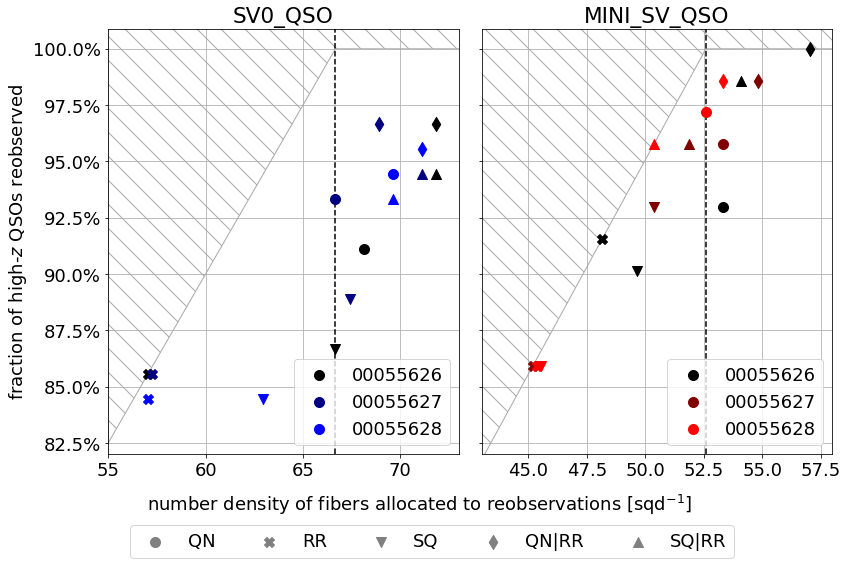

In [8]:
## Standard version of plot
filename = '../plots/classifier_performance_selecting_for_reobservation_tile68002_night20200315.pdf'
eff_area = 1.35
zcut = 2.1
dv_max = 6000. # km/s
ymin = 0.82

# Object filters (for different targeting choices)
from astropy.io import fits
mini_sv_qso_data = fits.open(qnet_path+'/data/MiniSV/SV0/1exp/MiniSV_data_1exp_00055626_MINI_SV_QSO_lmax9800.fits')
mini_sv_qso_tids = mini_sv_qso_data[1].data['TARGETID']
mini_sv_qso_data.close()
filters = {'SV0_QSO': np.ones(len(data_table)).astype('bool'),
           'MINI_SV_QSO': np.in1d(data_table['OBJ_ID'],mini_sv_qso_tids),
          }

# Number of expected high-z QSOs per square degree in DESI
true_highzqso = data_table['ISQSO_VI']&(data_table['Z_VI']>=2.1)
n_highz_desi = {'SV0_QSO': (true_highzqso&filters['SV0_QSO']).sum()/eff_area, 
                'MINI_SV_QSO': (true_highzqso&filters['MINI_SV_QSO']).sum()/eff_area, }
xmin = {'SV0_QSO': 55, 'MINI_SV_QSO': 43}
xmax = {'SV0_QSO': 73, 'MINI_SV_QSO': 58}

# confidence thresholds.
cth_min = 0.0
cth_max = 1.0
n_int = 10
c_th = np.arange(cth_min,cth_max,(1/n_int)*(cth_max-cth_min))
c_th_choice = {'SV0_QSO': 0.4,
                'MINI_SV_QSO': 0.3}
p_min_choice = {'SV0_QSO': 0.2,
                'MINI_SV_QSO': 0.2}
n_detect = 1

strategies = {}
strategies_to_plot = {}

for k, filt_name in enumerate(filters.keys()):
    
    filt_strategies = {}
    
    for i,expid in enumerate(expids):

        # QN classifications.
        isqso_qn = ((data_table['C_QN {}'.format(expid)]>c_th_choice[filt_name]).sum(axis=1)>=n_detect)
        highz_qn = data_table['Z_QN {}'.format(expid)]>=zcut
        w_qn = [isqso_qn & highz_qn]
        #w_qn = [((data_table['C_QN {}'.format(expid)]>cth).sum(axis=1)>=n_detect)& highz_qn for cth in c_th]

        # RR classifications.
        isqso_rr = data_table['ISQSO_RR {}'.format(expid)]
        highz_rr = (data_table['Z_RR {}'.format(expid)]>=zcut)

        # SQ classifications.
        isqso_sq = (data_table['P_SQ {}'.format(expid)]>p_min_choice[filt_name])
        highz_sq = data_table['Z_SQ {}'.format(expid)]>=zcut

        c = np.zeros(3)
        c[(k-1)%3] = (i)/(len(expids)-1)

        filt_strategies['QN {} {}'.format(expid,filt_name)] = {
                            'w': w_qn,
                            'color': [c]*len(w_qn),
                            'marker': 'o',
                            'filter': filters[filt_name]
                           }

        filt_strategies['RR {} {}'.format(expid,filt_name)] = {
                            'w': [isqso_rr & highz_rr],
                            'color': [c],
                            'marker': 'X',
                            'filter': filters[filt_name]
                           }

        filt_strategies['SQ {} {}'.format(expid,filt_name)] = {
                            'w': [isqso_sq & highz_sq],
                            'color': [c],
                            'marker': 'v',
                            'filter': filters[filt_name]
                           }

        filt_strategies['QN|RR {} {}'.format(expid,filt_name)] = {
                            'w': [w|(isqso_rr & highz_rr) for w in filt_strategies['QN {} {}'.format(expid,filt_name)]['w']],
                            'color': [c]*len(w_qn),
                            'marker': 'd',
                            'filter': filters[filt_name]
                            }

        filt_strategies['SQ|RR {} {}'.format(expid,filt_name)] = {
                            'w': [w|(isqso_rr & highz_rr) for w in filt_strategies['SQ {} {}'.format(expid,filt_name)]['w']],
                            'color': [c],
                            'marker': '^',
                            'filter': filters[filt_name]
                            }

        """filt_strategies['QN|SQ|RR {} {}'.format(expid,filt_name)] = {
                            'w': [w_qn|w_sq|(isqso_rr & highz_rr) for w_sq in filt_strategies['SQ {} {}'.format(expid,filt_name)]['w'] for w_qn in filt_strategies['QN {} {}'.format(expid,filt_name)]['w']],
                            'color': [c],
                            'marker': '*',
                            'filter': filters[filt_name]
                            }"""
        
    filt_strategies_to_plot = {}
    filt_strategies_to_plot['QN'] = ['QN {} {}'.format(expid,filt_name) for expid in expids]
    filt_strategies_to_plot['SQ'] = ['QN {} {}'.format(expid,filt_name) for expid in expids]
    filt_strategies_to_plot['RR'] = ['QN {} {}'.format(expid,filt_name) for expid in expids]
    filt_strategies_to_plot['QN|RR'] = ['QN|RR {} {}'.format(expid,filt_name) for expid in expids]
    filt_strategies_to_plot['SQ|RR'] = ['SQ|RR {} {}'.format(expid,filt_name) for expid in expids]
        
    strategies[filt_name] = filt_strategies
    strategies_to_plot[filt_name] = filt_strategies_to_plot
    
print(strategies_to_plot)
fig, axs = plot.plot_reobservation_performance(data_table,strategies,filename=filename,
                                               figsize=figsize,eff_area=eff_area,dv_max=dv_max,
                                               zcut=zcut,ymin=ymin,xmin=xmin,xmax=xmax,
                                               verbose=False,n_highz_desi=n_highz_desi,nydec=1,filters=filters,
                                               marker_size=100)

for k, filt_name in enumerate(filters.keys()):
    artists = []
    labels = []
    for i,expid in enumerate(expids):
        ## Add colour blobs to legend for exposure id
        c = np.zeros(3)
        c[(k-1)%3] = (i)/(len(expids)-1)
        artists += [axs[0,k].scatter([],[],color=c,s=100)]
        labels += ['{}'.format(expid)]
    axs[0,k].legend(artists,labels,ncol=1,loc=4)

plt.show()